## Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl

In [2]:
df=pd.read_csv("C://Users//Sreerag//Data Science//Internship//Datasets//news_sentiment_analysis.csv")
df.head()

,Source,Author,Title,Description,URL,Published At,Sentiment,Type
0,stgnews,Bridger Palmer,Pine View High teacher wins Best in State awar...,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",https://www.stgeorgeutah.com/news/archive/2024...,2024-07-12T23:45:25+00:00,positive,Business
1,Zimbabwe Mail,Staff Reporter,Businesses Face Financial Strain Amid Liquidit...,"Harare, Zimbabwe – Local businesses are grappl...",https://www.thezimbabwemail.com/business/busin...,2024-07-12T22:59:42+00:00,neutral,Business
2,4-traders,NaN,Musk donates to super pac working to elect Tru...,(marketscreener.com) Billionaire Elon Musk has...,https://www.marketscreener.com/business-leader...,2024-07-12T22:52:55+00:00,positive,Business
3,4-traders,NaN,US FTC issues warning to franchisors over unfa...,(marketscreener.com) A U.S. trade regulator on...,https://www.marketscreener.com/quote/stock/MCD...,2024-07-12T22:41:01+00:00,negative,Business
4,PLANET,NaN,Rooftop solar's dark side,4.5 million households in the U.S. have solar ...,https://www.npr.org/2024/07/12/1197961036/roof...,2024-07-12T22:28:19+00:00,positive,Business


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Source        3500 non-null   object
 1   Author        2512 non-null   object
 2   Title         3500 non-null   object
 3   Description   3500 non-null   object
 4   URL           3500 non-null   object
 5   Published At  3500 non-null   object
 6   Sentiment     3500 non-null   object
 7   Type          3500 non-null   object
dtypes: object(8)
memory usage: 218.9+ KB


In [4]:
df.isnull().sum()

Source            0
Author          988
Title             0
Description       0
URL               0
Published At      0
Sentiment         0
Type              0
dtype: int64

## Handling NaN

In [5]:
import seaborn as sns

<Axes: >

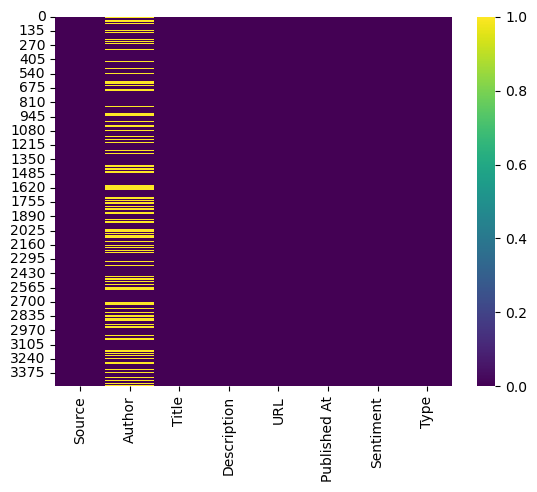

In [6]:
sns.heatmap(df.isnull(),cmap='viridis')

In [7]:
df.fillna("Unknown Author", inplace=True)

<Axes: >

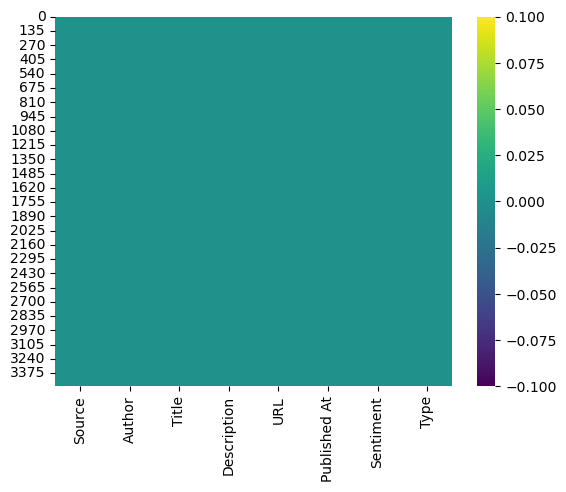

In [8]:
sns.heatmap(df.isnull(),cmap='viridis')

In [9]:
df.isnull().sum()

Source          0
Author          0
Title           0
Description     0
URL             0
Published At    0
Sentiment       0
Type            0
dtype: int64

## Data Visualization

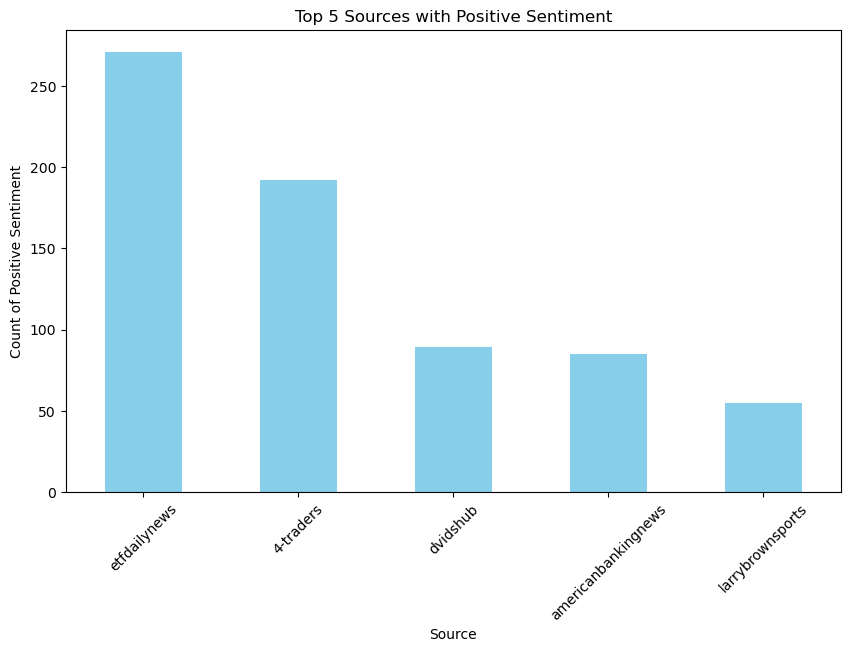

In [10]:
positive_df = df[df['Sentiment'] == 'positive']

top_positive_sources = positive_df['Source'].value_counts().head(5)

plt.figure(figsize=(10, 6))
top_positive_sources.plot(kind='bar', color='skyblue')
plt.title('Top 5 Sources with Positive Sentiment')
plt.xlabel('Source')
plt.ylabel('Count of Positive Sentiment')
plt.xticks(rotation=45)
plt.show()


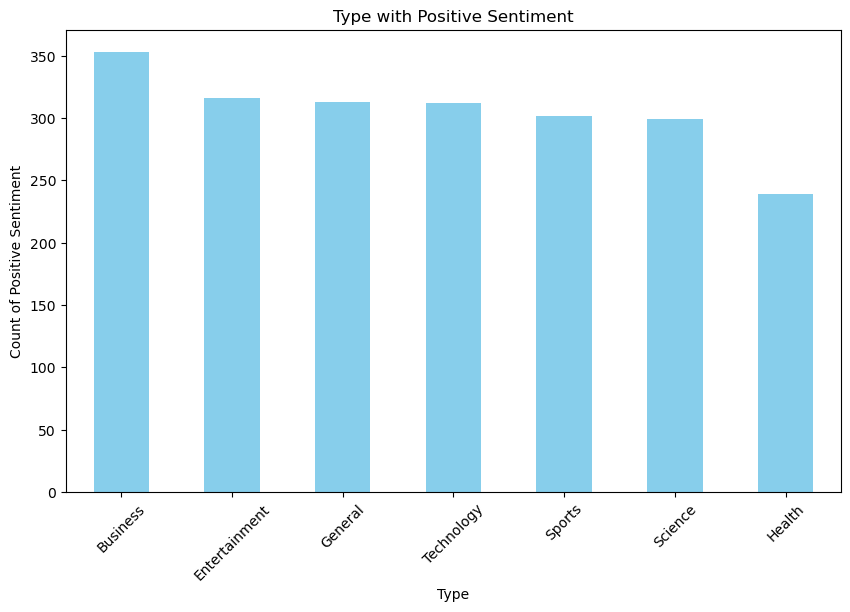

In [11]:
positive_df = df[df['Sentiment'] == 'positive']

top_positive_type = positive_df['Type'].value_counts()

plt.figure(figsize=(10, 6))
top_positive_type.plot(kind='bar', color='skyblue')
plt.title('Type with Positive Sentiment')
plt.xlabel('Type')
plt.ylabel('Count of Positive Sentiment')
plt.xticks(rotation=45)
plt.show()


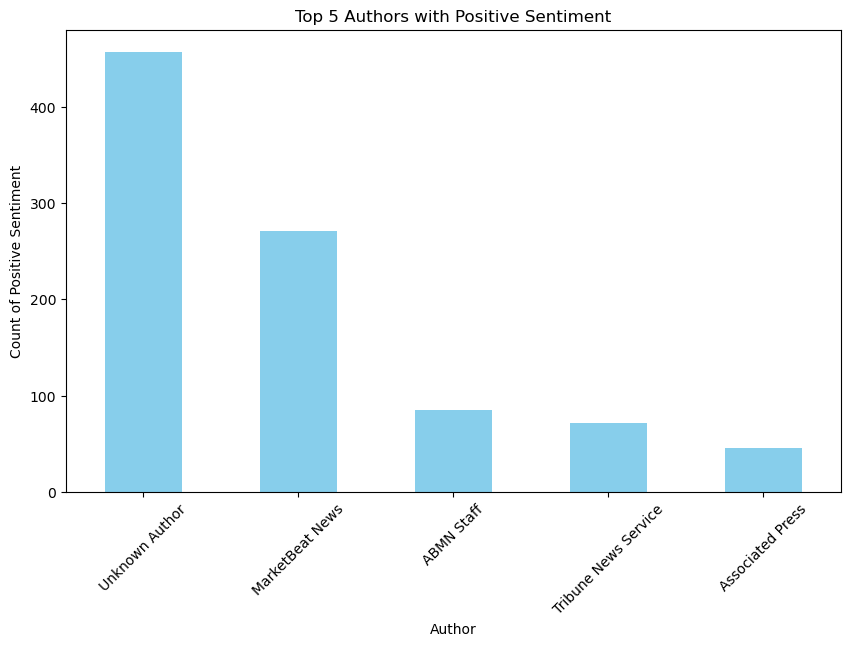

In [12]:
positive_df = df[df['Sentiment'] == 'positive']

top_positive_author = positive_df['Author'].value_counts().head(5)

plt.figure(figsize=(10, 6))
top_positive_author.plot(kind='bar', color='skyblue')
plt.title('Top 5 Authors with Positive Sentiment')
plt.xlabel('Author')
plt.ylabel('Count of Positive Sentiment')
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='Sentiment', ylabel='count'>

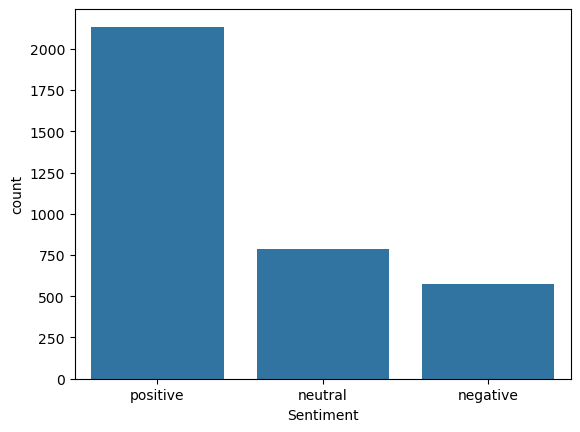

In [13]:
sns.countplot(x='Sentiment',data=df)

## Handling the imbalance of sentiment class

In [14]:
positive_df = df[df['Sentiment'] == 'positive']
neutral_df = df[df['Sentiment'] == 'neutral']
negative_df = df[df['Sentiment'] == 'negative']

positive_df_downsampled = positive_df.sample(n=750, random_state=1)

df_balanced = pd.concat([positive_df_downsampled, neutral_df, negative_df])

df_balanced = df_balanced.sample(frac=1, random_state=1).reset_index(drop=True)

<Axes: xlabel='Sentiment', ylabel='count'>

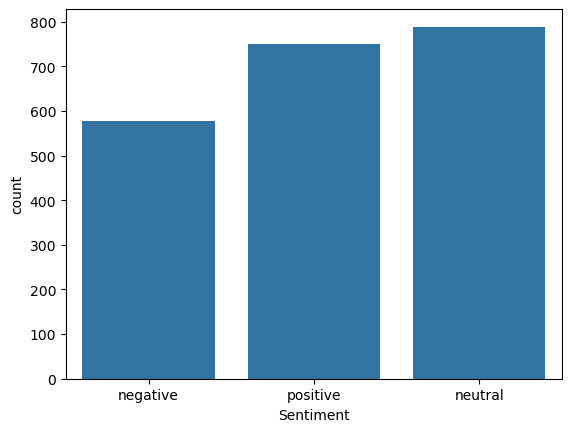

In [15]:
sns.countplot(x='Sentiment',data=df_balanced)

In [16]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Source        2116 non-null   object
 1   Author        2116 non-null   object
 2   Title         2116 non-null   object
 3   Description   2116 non-null   object
 4   URL           2116 non-null   object
 5   Published At  2116 non-null   object
 6   Sentiment     2116 non-null   object
 7   Type          2116 non-null   object
dtypes: object(8)
memory usage: 132.4+ KB


## Feature Extraction and Preprocessing

In [17]:
import re
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

In [35]:
df_balanced.head()

,Description,Sentiment
0,marketscreenercom the board of directors of lh...,negative
1,in den letzten zwei wochen wurde accel enterta...,positive
2,on june hpital glengarry memorial hospital hg...,positive
3,niestetal shortseller worldquant llc steiger...,neutral
4,staff sgt kimberly glaspie an information tech...,negative


In [19]:
df_balanced.drop(columns=['Source','Author','Title','URL','Published At','Type'], inplace=True)

In [20]:
df_balanced.head()

,Description,Sentiment
0,(marketscreener.com) The Board of Directors of...,negative
1,In den letzten zwei Wochen wurde Accel Enterta...,positive
2,"On June 26, Hôpital Glengarry Memorial Hospita...",positive
3,Niestetal (www.aktiencheck.de) - Shortseller W...,neutral
4,"Staff Sgt. Kimberly Glaspie, an information te...",negative


In [21]:
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

df_balanced['Description'] = df_balanced['Description'].apply(clean_text)
df_balanced

,Description,Sentiment
0,marketscreenercom the board of directors of lh...,negative
1,in den letzten zwei wochen wurde accel enterta...,positive
2,on june hpital glengarry memorial hospital hg...,positive
3,niestetal shortseller worldquant llc steiger...,neutral
4,staff sgt kimberly glaspie an information tech...,negative
...,...,...
2111,the association is critical of how health nz h...,neutral
2112,tempo di lettura minutiil settore professiona...,neutral
2113,linstitut des sciences des socits inss du burk...,neutral
2114,headlands technologies llc raised its position...,positive


In [22]:
x=df_balanced['Description']
y=df_balanced['Sentiment']

In [23]:
encoder=LabelEncoder()
y=encoder.fit_transform(y)

In [24]:
with open('label_encoder.pkl', 'wb') as encoder_file:
    pkl.dump(encoder, encoder_file)

In [25]:
label_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'negative': 0, 'neutral': 1, 'positive': 2}


## Fitting & Evaluation

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.3)

In [27]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1481,)
(635,)
(1481,)
(635,)


In [28]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', RandomForestClassifier(n_estimators=200,max_depth=None,min_samples_leaf=1,min_samples_split=2))
])

In [29]:
pipeline.fit(xtrain, ytrain)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('classifier', RandomForestClassifier(n_estimators=200))])

In [30]:
pred = pipeline.predict(xtest)
pred

array([2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 2, 0, 1, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 0, 2, 1, 0, 1,
       1, 0, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 0, 0, 2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 0, 2, 0, 1, 2,
       2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 0, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2,
       2, 1, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 0, 1, 2, 0, 1, 2, 1,
       2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2,
       1, 2, 0, 1, 0, 0, 1, 1, 2, 0, 2, 2, 1, 0, 2,

In [31]:
accuracy=accuracy_score(ytest,pred)
accuracy

0.8251968503937008

## Hyperparameter Tuning

In [32]:
# param_grid = {
#     'classifier__n_estimators': [100, 200],  # Number of trees in the forest
#     'classifier__max_depth': [None, 10, 20],  # Maximum depth of the tree
#     'classifier__min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
#     'classifier__min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
# }

# grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# grid_search.fit(xtrain, ytrain)

# print("Best Parameters:", grid_search.best_params_)

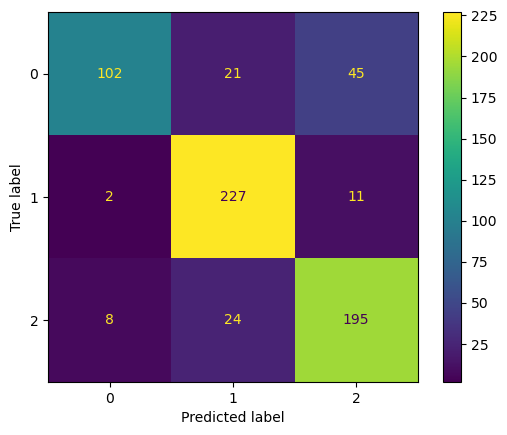

In [33]:
cm=confusion_matrix(ytest,pred)
d=ConfusionMatrixDisplay(confusion_matrix=cm)
d.plot()

In [34]:
with open('sentiment_model.pkl', 'wb') as file:
    pkl.dump(pipeline, file)